In [1]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import pathlib

import scipy.stats as ss
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
#from mlxtend.plotting import plot_learning_curves
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
def spanish_method(iso2,sym):
    df = pd.read_csv(iso2+'.csv')
    df1 = df[df['B7.1']==1]
    df2 = df1[df1['B8.NA']==0]
    df_filter = df2[df2['B8.3']==0]
    
    list_risk = []
    for i in range(len(df_filter.index)):
        risk= 1*df_filter['B1_4.1'][df_filter.index[i]] + 2*df_filter['B1_1.1'][df_filter.index[i]] + 5*df_filter['B1_10.1'][df_filter.index[i]]
        list_risk.append(risk)
    df_filter['risk']=list_risk
    
    
    list_sum_sym=[]
    for i in range(len(df_filter.index)):
        sum_sym= np.sum(df_filter['B1_4.1'][df_filter.index[i]]+df_filter['B1_10.1'][df_filter.index[i]]+df_filter['B1_3.1'][df_filter.index[i]]+df_filter['B1_13.1'][df_filter.index[i]]+df_filter['B1_1.1'][df_filter.index[i]]+df_filter['B1_7.1'][df_filter.index[i]]+df_filter['B1_2.1'][df_filter.index[i]]+df_filter['B1_12.1'][df_filter.index[i]])
        list_sum_sym.append(sum_sym)
    df_filter['sum_sym']=list_sum_sym
    

    list_sm = []
    for i in range(len(df_filter.index)):
        if (df_filter['risk'][df_filter.index[i]]>=3  and df_filter['sum_sym'][df_filter.index[i]]>=sym):
            list_sm.append(1)
        else:
            list_sm.append(0)
    df_filter['spanish_method'] = list_sm
    
    Y_test = df_filter['B8.1']
    y_pred = df_filter['spanish_method']

    print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
    print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
    print(f'Recall score: {recall_score(Y_test,y_pred)}')
    print("")
    matrix = confusion_matrix(Y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

    print('Specificity:', tn/(tn+fp))
    print(f'F1 score: {f1_score(Y_test,y_pred)}')
    print(f'Precision score: {precision_score(Y_test,y_pred)}')
    print(matrix)
    print("")
    print(classification_report(Y_test, y_pred))
    plt.figure(figsize=(7,7))
    sns.heatmap(matrix,annot=True, square = True, fmt='g')
    plt.show()

### Testing

Accuracy Score: 0.9046923024383581
Area Under Curve: 0.6750605049797092
Recall score: 0.3705555555555556

Specificity: 0.9795654544038627
F1 score: 0.4887521066901151
Precision score: 0.7176673122444588
[[62893  1312]
 [ 5665  3335]]

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     64205
           1       0.72      0.37      0.49      9000

    accuracy                           0.90     73205
   macro avg       0.82      0.68      0.72     73205
weighted avg       0.89      0.90      0.89     73205



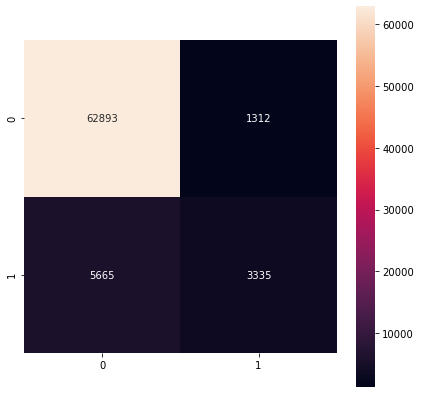

In [4]:
spanish_method('ES',3)

Accuracy Score: 0.900293695785807
Area Under Curve: 0.6439398800716455
Recall score: 0.304

Specificity: 0.983879760143291
F1 score: 0.4284707540521494
Precision score: 0.7255369928400954
[[63170  1035]
 [ 6264  2736]]

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     64205
           1       0.73      0.30      0.43      9000

    accuracy                           0.90     73205
   macro avg       0.82      0.64      0.69     73205
weighted avg       0.89      0.90      0.88     73205



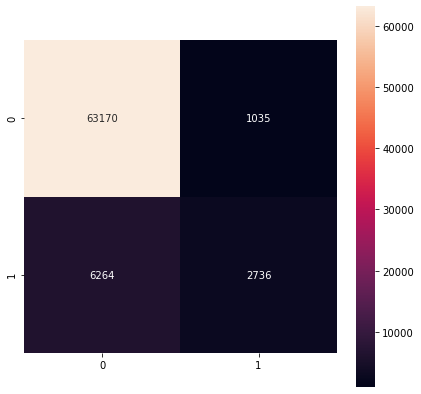

In [5]:
spanish_method('ES',4)

Accuracy Score: 0.971553099465578
Area Under Curve: 0.6954829211070443
Recall score: 0.4046311768918596

Specificity: 0.9863346653222292
F1 score: 0.41958041958041953
Precision score: 0.43567664824572677
[[316933   4391]
 [  4988   3390]]

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    321324
           1       0.44      0.40      0.42      8378

    accuracy                           0.97    329702
   macro avg       0.71      0.70      0.70    329702
weighted avg       0.97      0.97      0.97    329702



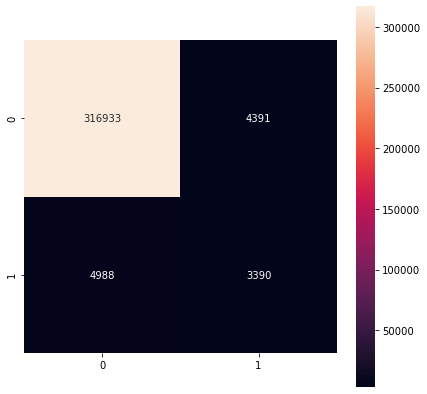

In [6]:
spanish_method('DE',3)

Accuracy Score: 0.9733486603053667
Area Under Curve: 0.661529678014389
Recall score: 0.3330150393888756

Specificity: 0.9900443166399024
F1 score: 0.38839006055543956
Precision score: 0.46585406578727667
[[318125   3199]
 [  5588   2790]]

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    321324
           1       0.47      0.33      0.39      8378

    accuracy                           0.97    329702
   macro avg       0.72      0.66      0.69    329702
weighted avg       0.97      0.97      0.97    329702



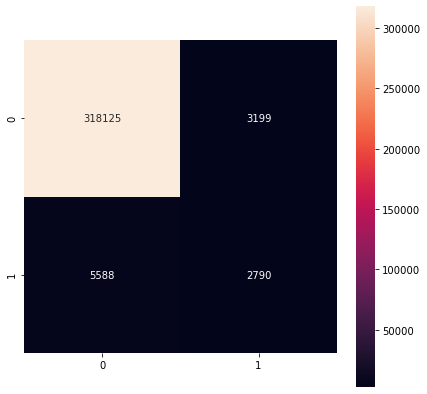

In [7]:
spanish_method('DE',4)

Accuracy Score: 0.9279490133947861
Area Under Curve: 0.7003667759632696
Recall score: 0.4287873399715505

Specificity: 0.9719462119549885
F1 score: 0.4908656048038268
Precision score: 0.5739616803522551
[[124032   3580]
 [  6425   4823]]

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    127612
           1       0.57      0.43      0.49     11248

    accuracy                           0.93    138860
   macro avg       0.76      0.70      0.73    138860
weighted avg       0.92      0.93      0.92    138860



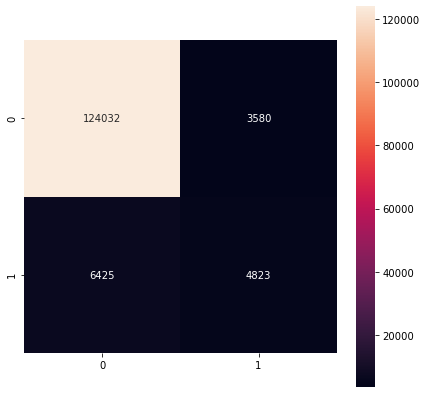

In [8]:
spanish_method('FR',3)

Accuracy Score: 0.9286475586922079
Area Under Curve: 0.6753318781607244
Recall score: 0.37304409672830724

Specificity: 0.9776196595931417
F1 score: 0.4585792349726776
Precision score: 0.5950085082246171
[[124756   2856]
 [  7052   4196]]

              precision    recall  f1-score   support

           0       0.95      0.98      0.96    127612
           1       0.60      0.37      0.46     11248

    accuracy                           0.93    138860
   macro avg       0.77      0.68      0.71    138860
weighted avg       0.92      0.93      0.92    138860



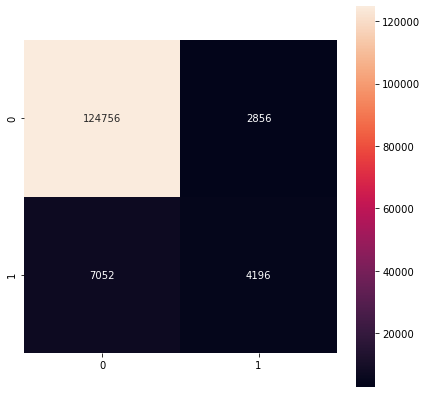

In [9]:
spanish_method('FR',4)

Accuracy Score: 0.8085318097194581
Area Under Curve: 0.6607701327216925
Recall score: 0.36079832995951416

Specificity: 0.960741935483871
F1 score: 0.48879461798860185
Precision score: 0.7575375215832116
[[89349  3651]
 [20209 11407]]

              precision    recall  f1-score   support

           0       0.82      0.96      0.88     93000
           1       0.76      0.36      0.49     31616

    accuracy                           0.81    124616
   macro avg       0.79      0.66      0.69    124616
weighted avg       0.80      0.81      0.78    124616



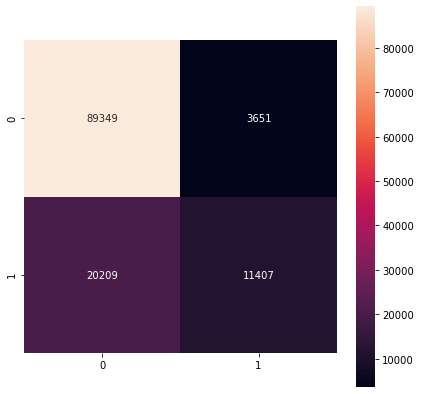

In [10]:
spanish_method('IN',3)

Accuracy Score: 0.80447133594402
Area Under Curve: 0.6437908028057115
Recall score: 0.31759235829959515

Specificity: 0.969989247311828
F1 score: 0.45180885529157666
Precision score: 0.7824968827930174
[[90209  2791]
 [21575 10041]]

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     93000
           1       0.78      0.32      0.45     31616

    accuracy                           0.80    124616
   macro avg       0.79      0.64      0.67    124616
weighted avg       0.80      0.80      0.77    124616



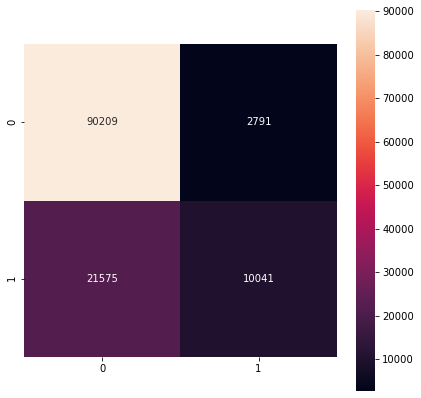

In [11]:
spanish_method('IN',4)

Accuracy Score: 0.9249574579212508
Area Under Curve: 0.6479552553850071
Recall score: 0.30838159097836026

Specificity: 0.9875289197916538
F1 score: 0.4309199318568995
Precision score: 0.7150530035335689
[[159638   2016]
 [ 11346   5059]]

              precision    recall  f1-score   support

           0       0.93      0.99      0.96    161654
           1       0.72      0.31      0.43     16405

    accuracy                           0.92    178059
   macro avg       0.82      0.65      0.70    178059
weighted avg       0.91      0.92      0.91    178059



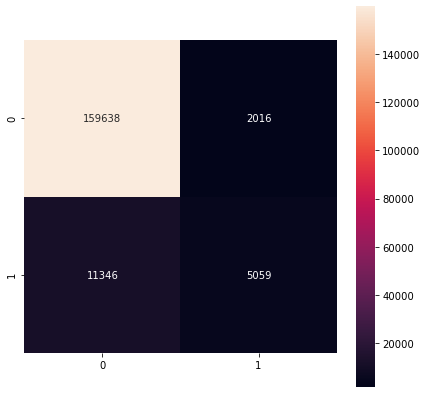

In [12]:
spanish_method('IT',3)

Accuracy Score: 0.9223965090222903
Area Under Curve: 0.6196249020719359
Recall score: 0.24846083511124656

Specificity: 0.9907889690326253
F1 score: 0.3710514337733272
Precision score: 0.7324348607367476
[[160165   1489]
 [ 12329   4076]]

              precision    recall  f1-score   support

           0       0.93      0.99      0.96    161654
           1       0.73      0.25      0.37     16405

    accuracy                           0.92    178059
   macro avg       0.83      0.62      0.66    178059
weighted avg       0.91      0.92      0.90    178059



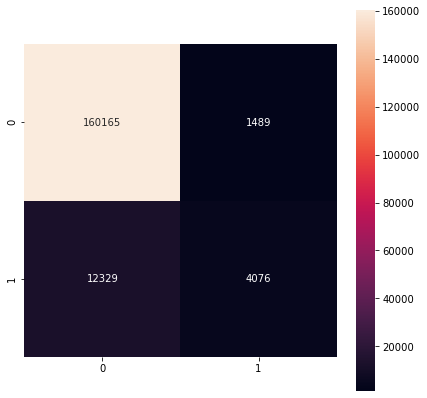

In [13]:
spanish_method('IT',4)

Accuracy Score: 0.936213446417528
Area Under Curve: 0.6561503425959584
Recall score: 0.3406801007556675

Specificity: 0.9716205844362493
F1 score: 0.3747835122965015
Precision score: 0.41647421093148573
[[51903  1516]
 [ 2094  1082]]

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     53419
           1       0.42      0.34      0.37      3176

    accuracy                           0.94     56595
   macro avg       0.69      0.66      0.67     56595
weighted avg       0.93      0.94      0.93     56595



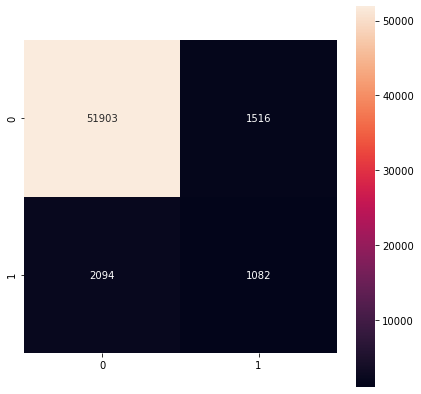

In [14]:
spanish_method('JP',3)

Accuracy Score: 0.9405247813411078
Area Under Curve: 0.6341505687440431
Recall score: 0.2890428211586902

Specificity: 0.9792583163293959
F1 score: 0.35294117647058826
Precision score: 0.4531095755182626
[[52311  1108]
 [ 2258   918]]

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     53419
           1       0.45      0.29      0.35      3176

    accuracy                           0.94     56595
   macro avg       0.71      0.63      0.66     56595
weighted avg       0.93      0.94      0.93     56595



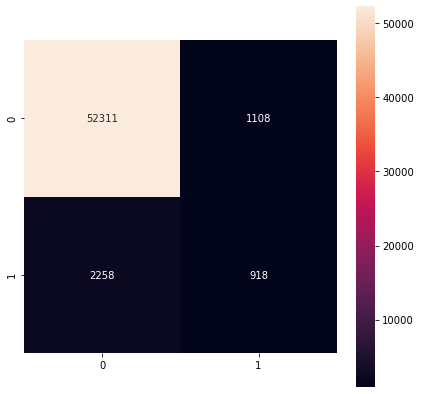

In [15]:
spanish_method('JP',4)

Accuracy Score: 0.8072366353151672
Area Under Curve: 0.7134314910123969
Recall score: 0.4735744917407878

Specificity: 0.953288490284006
F1 score: 0.5993517262173979
Precision score: 0.8161009990420145
[[109693   5375]
 [ 26515  23853]]

              precision    recall  f1-score   support

           0       0.81      0.95      0.87    115068
           1       0.82      0.47      0.60     50368

    accuracy                           0.81    165436
   macro avg       0.81      0.71      0.74    165436
weighted avg       0.81      0.81      0.79    165436



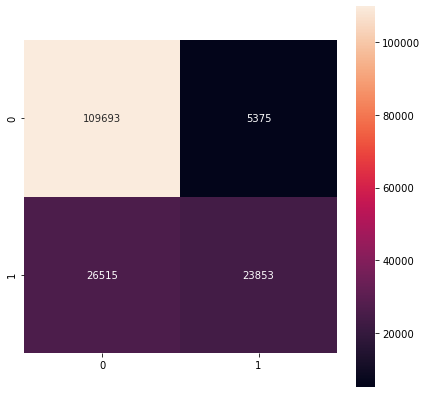

In [16]:
spanish_method('MX',3)

Accuracy Score: 0.795558403249595
Area Under Curve: 0.6883695555065191
Recall score: 0.4142908195679797

Specificity: 0.9624482914450586
F1 score: 0.552358515538144
Precision score: 0.8284500555820232
[[110747   4321]
 [ 29501  20867]]

              precision    recall  f1-score   support

           0       0.79      0.96      0.87    115068
           1       0.83      0.41      0.55     50368

    accuracy                           0.80    165436
   macro avg       0.81      0.69      0.71    165436
weighted avg       0.80      0.80      0.77    165436



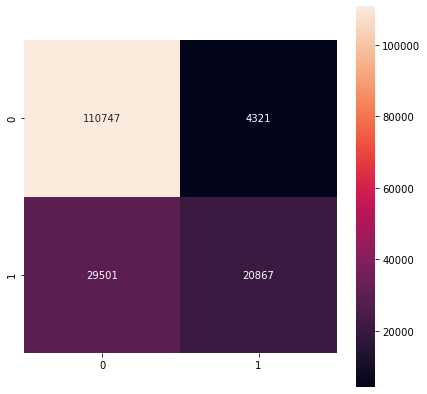

In [17]:
spanish_method('MX',4)